In [26]:
#Those are the libraries we would be using: since python does not have yahoo finance, we have to install it!
import numpy as np 
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization 
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as optimization

## Download Stock Price 

In [104]:
## Stocks we will be using : Apple, Amazon, JP Morgan, Pepsi, Target, Tesla 
Stocks= ['AAPL', 'AMZN', 'JPM', 'PEP', 'TGT', 'TSLA']
start_date = '2018-01-01'
end_date = '2021-12-30'
Number_Trading_Days=252
Num_Portofolio=10000
Risk_Free=0.0463
len(Stocks)

6

## Price Movement

[*********************100%%**********************]  6 of 6 completed


<function matplotlib.pyplot.show(close=None, block=None)>

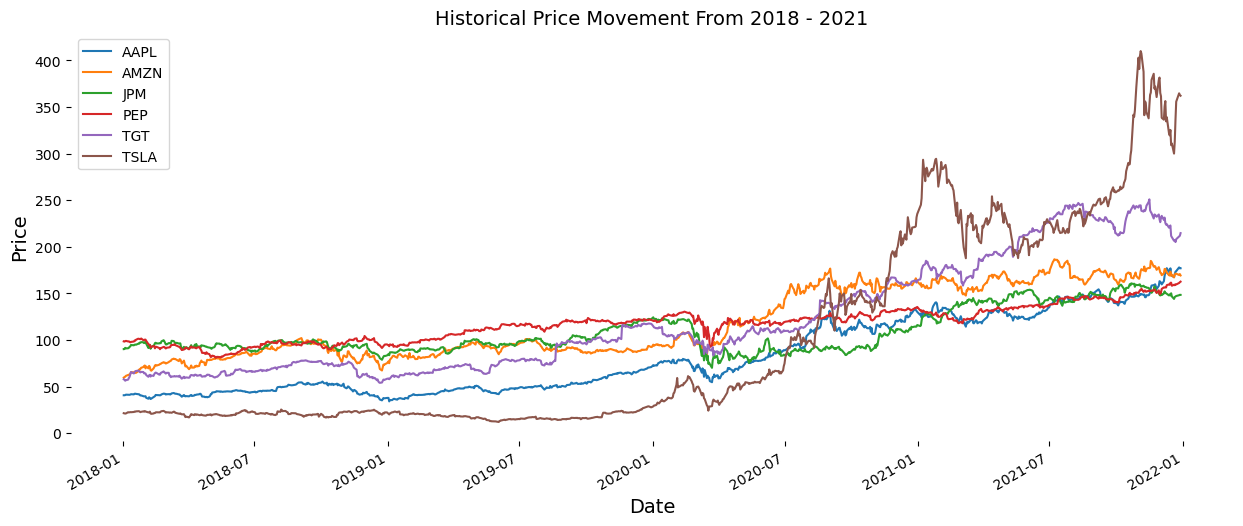

In [83]:
Data = yf.download(Stocks,start=start_date,end=end_date)['Adj Close']
Data.plot(figsize=(15,6))# width 20, height 10
plt.xlabel('Date',fontsize=14,)
plt.ylabel('Price',fontsize=14)
plt.xticks( fontsize = 10)
plt.yticks( fontsize = 10)
plt.title('Historical Price Movement From 2018 - 2021',fontsize=14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show

## Compute the descriptive Statistics

In [89]:
log_return = np.log(Data / Data.shift(1))[1:]

In [90]:
log_return.corr()

,AAPL,AMZN,JPM,PEP,TGT,TSLA
AAPL,1.000000,0.647638,0.460342,0.507634,0.381962,0.426254
AMZN,0.647638,1.000000,0.283953,0.338513,0.322228,0.385217
JPM,0.460342,0.283953,1.000000,0.476918,0.346128,0.267210
PEP,0.507634,0.338513,0.476918,1.000000,0.406970,0.216269
TGT,0.381962,0.322228,0.346128,0.406970,1.000000,0.173558
TSLA,0.426254,0.385217,0.267210,0.216269,0.173558,1.000000


In [93]:
pd.DataFrame(log_return.mean() * 252, columns=['Annual Mean Log Return'])

,Annual Mean Log Return
AAPL,0.368937
AMZN,0.262266
JPM,0.124956
PEP,0.125704
TGT,0.329183
TSLA,0.709585


In [94]:
Annual_Return=np.array(log_return.mean()*Number_Trading_Days)
cov_matrix=log_return.cov() * Number_Trading_Days

In [95]:
cov_matrix

,AAPL,AMZN,JPM,PEP,TGT,TSLA
AAPL,0.108545,0.066575,0.049433,0.038311,0.038655,0.091189
AMZN,0.066575,0.097351,0.028877,0.024194,0.030883,0.078045
JPM,0.049433,0.028877,0.106235,0.035608,0.034654,0.056553
PEP,0.038311,0.024194,0.035608,0.052472,0.028636,0.032168
TGT,0.038655,0.030883,0.034654,0.028636,0.094355,0.034617
TSLA,0.091189,0.078045,0.056553,0.032168,0.034617,0.421633


## Generate Portfolio

In [98]:
portfolio_weight=[]
portfolio_return=[]
portfolio_risk=[]
portfolio_sharpe=[]
for _ in range(Num_Portofolio):# here we are going to generate 10,000 different weights.

    w=np.random.random(len(Stocks))# 1 by 6 matrix,
    w/=sum(w)# sum of the weight must add up to 1

    portfolio_weight.append(w)# weight of six stocks
    portfolio_return.append(np.sum(log_return.mean()*w)*Number_Trading_Days) # return of the portfolio
    portfolio_risk.append(np.sqrt(np.dot(w.T,np.dot(log_return.cov()*Number_Trading_Days,w)))) # risk
    portfolio_sharpe.append(portfolio_return[_]/portfolio_risk[_])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


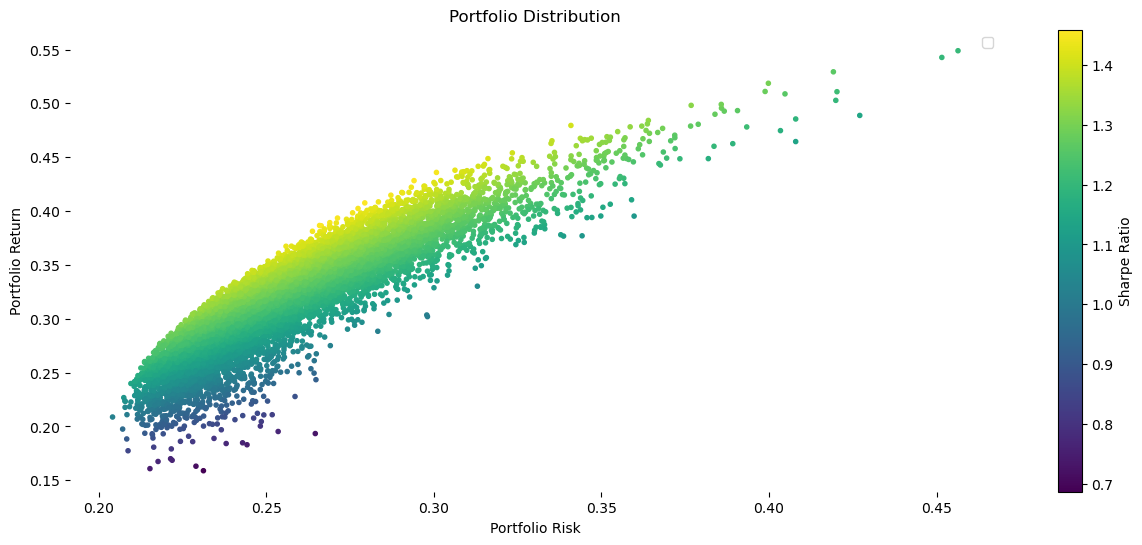

In [99]:
plt.figure(figsize=(15,6))
plt.scatter(portfolio_risk,portfolio_return,c=portfolio_sharpe,marker='.')
plt.colorbar(label='Sharpe Ratio')
#plt.plot(portfolio_risks_WithoutBound, target_returns, 'y-', label='Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Return')
plt.title('Portfolio Distribution')
#plt.plot(portfolio_risks_WithoutBound[Optimal_Port_Index],target_returns[Optimal_Port_Index],'g*',c='red',markersize=10.0)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.legend()
plt.show()

## Portfolio Optimization 

In [135]:

from scipy.optimize import minimize
def objective(weights): # This function will give us the risk of the portfolio 
    return np.dot(weights.T, np.dot(cov_matrix, weights))

# Constraint functions
def return_constraint(weights):  ## This give us the difference of expected return and target return. In theory, we want it to be 0 
    return np.dot(Annual_Return, weights) - target_return

def weight_constraint(weights):## we want the weight to be 0 always . This is our second constraint.
    return np.sum(weights) - 1
# Here we don't set a minimum weight and maximum weight for each stock 
bounds = tuple((0, 1) for asset in range(len(Stocks)))
# Optimization
target_returns = np.linspace(0.2,max(Annual_Return),100)
portfolio_risks_WithBound = []
optimal_weights=[]
init_guess=[1/len(Stocks) for _ in range(len(Stocks))]
for target_return in target_returns:
    constraints = [{'type': 'eq', 'fun': return_constraint},
                   {'type': 'eq', 'fun': weight_constraint}]
                   
    result = minimize(objective,init_guess, bounds=bounds,constraints=constraints)
    portfolio_risks_WithBound.append(np.sqrt(result.fun))
    optimal_weights.append(result.x)

In [136]:
Optimal_Port_Index=np.argmax(target_returns/np.array(portfolio_risks_WithBound))
Best_Weight=optimal_weights[Optimal_Port_Index]
Highest_Sharpe= target_returns[Optimal_Port_Index]  / portfolio_risks_WithBound[Optimal_Port_Index]

### Capital Asset Line Allocation 

In [155]:
Portfolio_W = np.linspace(0.5, 2, 50)
RF_W = Portfolio_W - 1
CAL_Return = RF_W * Risk_Free  + Portfolio_W * (target_returns[Optimal_Port_Index])  # subtract 0 because risk at Rf is 0
CAL_Risk = Portfolio_W * portfolio_risks_WithBound[Optimal_Port_Index]

C:\Users\hzw10\AppData\Local\Temp\ipykernel_13504\4248630737.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g*" (-> color='g'). The keyword argument will take precedence.
  plt.plot(portfolio_risks_WithBound[Optimal_Port_Index],target_returns[Optimal_Port_Index],'g*',c='red',markersize=10.0)


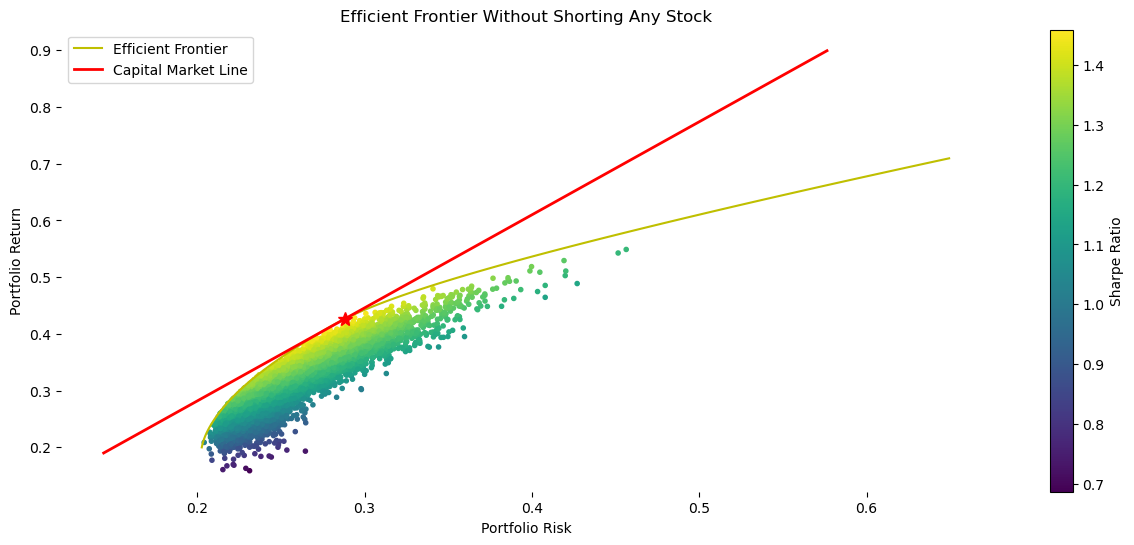

In [156]:
plt.figure(figsize=(15,6))
plt.scatter(portfolio_risk,portfolio_return,c=portfolio_sharpe,marker='.')
plt.colorbar(label='Sharpe Ratio')
plt.plot(portfolio_risks_WithBound, target_returns, 'y-', label='Efficient Frontier')
plt.xlabel('Portfolio Risk')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier Without Shorting Any Stock')
plt.plot(portfolio_risks_WithBound[Optimal_Port_Index],target_returns[Optimal_Port_Index],'g*',c='red',markersize=10.0)
plt.plot(CAL_Risk, CAL_Return, color='red', linestyle='-', linewidth=2, label='Capital Market Line')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.legend()
plt.show()

### Verify The weight Will give us the optimal Return and Optimal Risk

In [139]:
target_returns[Optimal_Port_Index]

0.4264823265272122

In [140]:
portfolio_risks_WithBound[Optimal_Port_Index]

0.2881697062830825

In [142]:
optimal_weights[Optimal_Port_Index] @ Annual_Return

0.42648232653157947

In [144]:
np.sqrt(np.dot(optimal_weights[Optimal_Port_Index].T, np.dot(cov_matrix, optimal_weights[Optimal_Port_Index])))

0.2881697062830825

## Optimal Portfolio With Highest Sharpe Ratio

In [146]:
print(f"Optimal Portfolio Weights for {target_returns[Optimal_Port_Index]*100 :.2f}% target return:")
for i, weight in enumerate(optimal_weights[Optimal_Port_Index]):
    print(f"{Stocks[i]}: {weight*100:.2f}%")
print(f"Risk Optimal Portfolio Weights for Optimal target return: {portfolio_risks_WithBound[Optimal_Port_Index]*100:.2f}% ")

Optimal Portfolio Weights for 42.65% target return:
AAPL: 30.54%
AMZN: 0.00%
JPM: 0.00%
PEP: 0.00%
TGT: 47.07%
TSLA: 22.39%
Risk Optimal Portfolio Weights for Optimal target return: 28.82% 


In [ ]:
## We can Build Portfolio Based on Different Expected Return 

In [148]:
# Set the target return to 20%
target_return = 0.25

# Define the constraints
constraints = [{'type': 'eq', 'fun': return_constraint},
               {'type': 'eq', 'fun': weight_constraint}]

# Run the optimization
bounds = tuple((0, 1) for asset in range(len(Stocks)))
result = minimize(objective, init_guess, bounds=bounds, constraints=constraints)

# Retrieve the optimized portfolio weights
optimal_weights_NoRM = result.x
Risk=np.sqrt(np.dot(optimal_weights_NoRM.T,np.dot(log_return.cov()*Number_Trading_Days,optimal_weights_NoRM)))
print(f"Optimal Portfolio Weights for {target_return*100 :.2f}% target return:")
for i, weight in enumerate(optimal_weights_NoRM):
    print(f"{Stocks[i]}: {weight*100:.2f}%")
print(f"Risk Optimal Portfolio Weights for {target_return * 100:.2f}% target return: {Risk*100:.2f}% ")

Optimal Portfolio Weights for 25.00% target return:
AAPL: 3.95%
AMZN: 19.28%
JPM: 3.65%
PEP: 40.12%
TGT: 27.40%
TSLA: 5.59%
Risk Optimal Portfolio Weights for 25.00% target return: 21.04% 


## Issues With Portfolio MPT

In [150]:
## Stocks we will be using : Apple, Amazon, JP Morgan, Pepsi, Target, Tesla 
Stocks= ['AAPL', 'AMZN', 'JPM', 'PEP', 'TGT', 'TSLA']
start_date = '2021-12-30'
end_date = '2023-12-30'


[*********************100%%**********************]  6 of 6 completed


<function matplotlib.pyplot.show(close=None, block=None)>

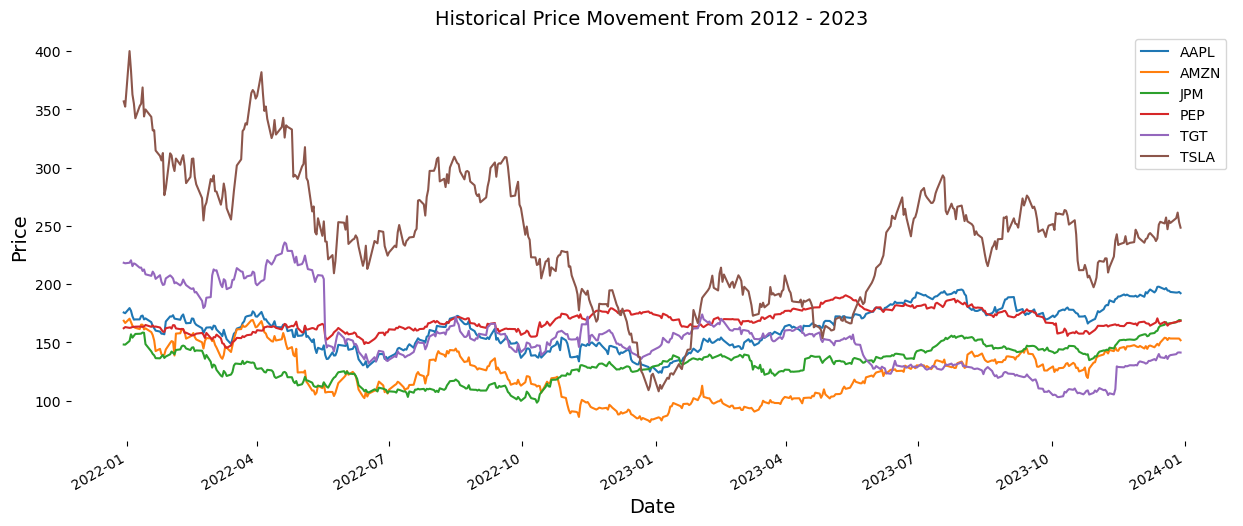

In [152]:
Data = yf.download(Stocks,start=start_date,end=end_date)['Adj Close']
Data.plot(figsize=(15,6))# width 20, height 10
plt.xlabel('Date',fontsize=14,)
plt.ylabel('Price',fontsize=14)
plt.xticks( fontsize = 10)
plt.yticks( fontsize = 10)
plt.title('Historical Price Movement From 2012 - 2023',fontsize=14)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show